In [33]:
# Import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,  LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [34]:
df = pd.read_csv("C:/Users/User/Downloads/Travel_Insurance.csv")
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [62]:
#1. Missing Value Treatement
df.columns[df.isnull().any()]

Index(['Gender'], dtype='object')

In [63]:
df.isnull().any()

Agency                  False
Agency Type             False
Distribution Channel    False
Product Name            False
Claim                   False
Duration                False
Destination             False
Net Sales               False
Commision (in value)    False
Gender                   True
Age                     False
dtype: bool

In [64]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [65]:
#The reason of not replacing the missing for Gender is because the percentage of missing value is too high.

In [66]:
#we can delete column Gender since it contain missing value
# and we do not require it in modelling and evaluation
column_df = df.dropna(axis=1)
column_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB


In [67]:
#Otherwise, we can delete entire row with missing value 
#In this way we can achive better accuracy 
#but we would lose large amount of data due to high percentage of missing value

In [68]:
#2. Outlier Analysis
from collections import Counter

def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 =  np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3 - Q1
        #outlier step
        outlier_step = IQR * 1.5
        #detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices 
        outlier_indices.extend(outlier_list_col)
   
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [86]:
detect_outliers(df,["Duration","Net Sales","Commision (in value)","Age"])

[0,
 1,
 9,
 20,
 24,
 25,
 251,
 252,
 253,
 254,
 394,
 396,
 414,
 424,
 425,
 426,
 427,
 607,
 613,
 780,
 781,
 806,
 807,
 809,
 810,
 941,
 1228,
 1259,
 1399,
 1409,
 1413,
 1583,
 1596,
 1600,
 1603,
 1773,
 1780,
 2216,
 2217,
 2222,
 2338,
 2361,
 2362,
 2363,
 2543,
 2722,
 2723,
 2724,
 2725,
 2736,
 2737,
 2907,
 2916,
 3062,
 3304,
 3308,
 3310,
 3428,
 3429,
 3430,
 3449,
 3610,
 3611,
 3612,
 3613,
 3769,
 3770,
 3771,
 3772,
 3930,
 3949,
 4051,
 4052,
 4068,
 4069,
 4070,
 4071,
 4160,
 4289,
 4420,
 4421,
 4429,
 4552,
 4553,
 4719,
 4722,
 4724,
 4726,
 4732,
 4734,
 4763,
 4764,
 4945,
 4946,
 4947,
 5163,
 5164,
 5165,
 5166,
 5192,
 5436,
 5437,
 5438,
 5439,
 5599,
 5600,
 5601,
 5801,
 5802,
 5816,
 5996,
 6012,
 6211,
 6212,
 6213,
 6404,
 6574,
 6575,
 6576,
 6711,
 6715,
 6878,
 6879,
 6983,
 7101,
 7102,
 7116,
 7266,
 7267,
 7268,
 7269,
 7276,
 7492,
 7493,
 7494,
 7495,
 7496,
 7508,
 7666,
 7679,
 7680,
 7698,
 7816,
 7826,
 7922,
 7924,
 7940,
 7941,

In [41]:
df.loc[detect_outliers(df,["Duration","Net Sales","Commision (in value)","Age"])] 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Genderismissing
3171,JZI,Airlines,Online,Basic Plan,No,80,PHILIPPINES,37.0,12.95,F,34,False
4049,JZI,Airlines,Online,Value Plan,No,66,HONG KONG,45.0,15.75,M,34,False
4284,JZI,Airlines,Online,Basic Plan,No,72,MYANMAR,42.0,14.70,F,35,False
4712,JZI,Airlines,Online,Basic Plan,No,72,INDONESIA,33.0,11.55,F,35,False
8689,JZI,Airlines,Online,Basic Plan,No,73,VIET NAM,30.0,10.50,M,34,False
11908,C2B,Airlines,Online,Bronze Plan,No,66,SINGAPORE,57.0,14.25,M,37,False
12236,JZI,Airlines,Online,Basic Plan,No,67,PHILIPPINES,42.0,14.70,F,35,False
12686,JZI,Airlines,Online,Basic Plan,No,79,CHINA,44.0,15.40,M,34,False
14812,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,FRANCE,19.8,11.88,NaN,37,True
14843,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,65,UNITED STATES,73.0,0.00,NaN,37,True


In [42]:
# dropping the outliear
df_1 = df.drop(detect_outliers(df,["Duration","Net Sales","Commision (in value)","Age"]), axis=0).reset_index(drop = True )

In [87]:
df[["Duration","Net Sales","Commision (in value)","Age"]].describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [88]:
columns = ["Duration","Net Sales","Commision (in value)","Age"]

for x in columns:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    print(x,":", ((df[x] < (Q1 - 1.5 * IQR)) | (df[x] > (Q3 + 1.5 * IQR))).sum())

Duration : 5566
Net Sales : 5543
Commision (in value) : 7063
Age : 7422


In [94]:
for x in columns:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[x].mean()
    median = df[x].median()
    for k in range(len(df[x])):
        if ((df[x][k] < (Q1 - 1.5 * IQR)) | (df[x][k] > (Q3 + 1.5 * IQR))):
            df.loc[k, x] = median 
            if (x == "Duration"):
                df.loc[k, x] = mean
            if pd.isnull(df[x][k]):
                if (x == "Duration"):
                    df.loc[k, x] = mean
                else:
                    df.loc[k, x] = median

In [95]:
for x in columns:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[x].mean()
    median = df[x].median()
    for k in range(len(df[x])):
        if ((df[x][k] < (Q1 - 1.5 * IQR)) | (df[x][k] > (Q3 + 1.5 * IQR))):
            df.loc[k, x] = median 
            if (x == "Net Sales"):
                df.loc[k, x] = mean
            if pd.isnull(df[x][k]):
                if (x == "Net Sales"):
                    df.loc[k, x] = mean
                else:
                    df.loc[k, x] = median

In [96]:
for x in columns:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[x].mean()
    median = df[x].median()
    for k in range(len(df[x])):
        if ((df[x][k] < (Q1 - 1.5 * IQR)) | (df[x][k] > (Q3 + 1.5 * IQR))):
            df.loc[k, x] = median 
            if (x == "Commision (in value)"):
                df.loc[k, x] = mean
            if pd.isnull(df[x][k]):
                if (x == "Commision (in value)"):
                    df.loc[k, x] = mean
                else:
                    df.loc[k, x] = median

In [97]:
for x in columns:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[x].mean()
    median = df[x].median()
    for k in range(len(df[x])):
        if ((df[x][k] < (Q1 - 1.5 * IQR)) | (df[x][k] > (Q3 + 1.5 * IQR))):
            df.loc[k, x] = median 
            if (x == "Age"):
                df.loc[k, x] = mean
            if pd.isnull(df[x][k]):
                if (x == "Age"):
                    df.loc[k, x] = mean
                else:
                    df.loc[k, x] = median

In [98]:
df.loc[1, "Duration"]

22.0

In [99]:
df.loc[1, "Net Sales"]

40.70201797050243

In [100]:
df.loc[1, "Commision (in value)"]

0.0

In [101]:
df.loc[1, "Age"]

36

In [92]:
df.loc[1, "Commision (in value)"]

9.57

In [102]:
for x in columns:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    print(x,":", ((df[x] < (Q1 - 1.5 * IQR)) | (df[x] > (Q3 + 1.5 * IQR))).sum())

Duration : 0
Net Sales : 0
Commision (in value) : 0
Age : 0


In [107]:
#3. Data Transformation
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,22.000000,MALAYSIA,40.702018,0.0,F,36
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,22.000000,MALAYSIA,40.702018,0.0,F,36
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,23.712867,AUSTRALIA,40.702018,0.0,NaN,36
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,22.000000,AUSTRALIA,40.702018,0.0,NaN,36
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,23.712867,ITALY,27.000000,0.0,NaN,36


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  float64
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 5.3+ MB


In [109]:
df.to_csv("./clean.csv")

In [110]:
X = df.drop(['Claim'],axis=1)
y = df['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

enc = OneHotEncoder(handle_unknown='ignore')
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [111]:
lr = LogisticRegression()
# fit on the training set
lr.fit(X_train, y_train)
# predict on test set
yhat = lr.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 98.47


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
from sklearn.linear_model import SGDClassifier

sgd =  SGDClassifier()
# fit on the training set
sgd.fit(X_train, y_train)
# predict on test set
yhat = sgd.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 98.47


In [113]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
# fit on the training set
decision_tree.fit(X_train, y_train)
# predict on test set
yhat = decision_tree.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 98.15


In [114]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
# fit on the training set
random_forest.fit(X_train, y_train)
# predict on test set
yhat = random_forest.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
# cv = cross_val_score(random_forest, X_train, y_train,cv=5)
# print('cross validation score of: %.2f' % (cv.mean()*100))
score = random_forest.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + ', score of: %.2f' % (score*100))

Accuracy: 98.30, score of: 98.30


In [115]:
from sklearn.svm import SVC

svc = SVC(probability = True, C = 1, kernel='linear')
svc.fit(X_train, y_train)
yhat = svc.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
# cv = cross_val_score(random_forest, X_train, y_train,cv=5)
# print('cross validation score of: %.2f' % (cv.mean()*100))
score = svc.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + ', score of: %.2f' % (score*100))

Accuracy: 98.46, score of: 98.46


In [116]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 80, 50, 30, 10, 5.0, 3.0, 1.0, 0.1, 0.2, 0.3, 0.6, 0.01, 0.02, 0.03, 0.001]
tolerant = [0.1, 0.001, 0.001, 0.0015, 0.0001, 0.00013, 0.00001, 0.000001]
max_iter = [100, 500, 1000, 5000, 10000, 50000]
multi_class = ['auto', 'ovr', 'multinomial']

grid = dict(solver=solvers,penalty=penalty,C=c_values, tol=tolerant, max_iter=max_iter, multi_class=multi_class)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
model = LogisticRegression()

lr_random = RandomizedSearchCV(estimator = model, param_distributions = grid, 
                                cv = 7, verbose=0, scoring="accuracy")
lr_random.fit(X_train, y_train)
print(lr_random.best_params_)

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

{'tol': 1e-06, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'max_iter': 100, 'C': 0.2}


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [117]:
lr = LogisticRegression(tol=0.0001, solver='newton-cg', penalty='l2', multi_class='auto',max_iter=5000, C=0.1)
# fit on the training set
lr.fit(X_train, y_train)
# predict on test set
yhat = lr.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 98.47


In [118]:
svc = SVC(C = 100, kernel='poly', gamma=0.01, degree=1)
svc.fit(X_train, y_train)
yhat = svc.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
# cv = cross_val_score(random_forest, X_train, y_train,cv=5)
# print('cross validation score of: %.2f' % (cv.mean()*100))
score = svc.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + ', score of: %.2f' % (score*100))

Accuracy: 98.46, score of: 98.46


In [119]:
svc = SVC(C = 10, kernel='poly', gamma=0.1, degree=5)
svc.fit(X_train, y_train)
yhat = svc.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
# cv = cross_val_score(random_forest, X_train, y_train,cv=5)
# print('cross validation score of: %.2f' % (cv.mean()*100))
score = svc.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + ', score of: %.2f' % (score*100))

Accuracy: 98.27, score of: 98.27


In [120]:
#4. New Feature (if any)
#We can check whether a rows is duplicated 
df.duplicated()

0        False
1         True
2        False
3        False
4        False
         ...  
63321     True
63322     True
63323     True
63324     True
63325     True
Length: 63326, dtype: bool

In [209]:
updated_df = df.drop_duplicates()

#4. Feature Selection
#predict Agency Type (Airlines or Travel Agency) based on 2 features
df['Agency Type']= df['Agency Type'].replace({'Travel Agency': 0, 'Airlines': 1})
feature_df=df.drop(['Agency', 'Distribution Channel', 'Product Name', 'Claim', 'Duration', 'Destination', 'Net Sales', 'Gender'], axis=1)
feature_df.head(10)

array = feature_df.values
X = array[:,1:3]
Y = array[:,0]

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
test = SelectKBest(score_func=chi2, k=1)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:2,:])

#the score for attribute 'Age' is higher, hence suggest it is the better feature than 'Commision (in value)' and
# a stronger relationship with the output ('Agency Type')

In [28]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [37]:
df['Product Name'] = df['Product Name'].replace(['Travel Cruise Protect Family'],'Travel Cruise Protect')

In [38]:
def load_dataset():
	# retrieve numpy array
	dataset = df.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

In [51]:
# load the dataset
X, y = load_dataset()
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (63226, 10) (63226,)
Test (100, 10) (100,)


In [40]:
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [41]:
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [52]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [54]:
#Chi-Squared Feature Selection
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [55]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 5686.874186
Feature 1: 4518.167694
Feature 2: 98.647076
Feature 3: 75033.864612
Feature 4: 359.999593
Feature 5: 11148.773538
Feature 6: 39449.628592
Feature 7: 61890.803757
Feature 8: 9949240.972831
Feature 9: 4808.389667


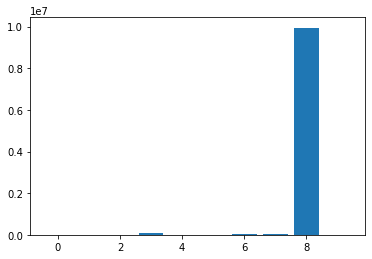

In [56]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
#input feature 3, 6, 7 and 8 are the most relevant 

In [58]:
#Mutual Information Feature Selection
from sklearn.feature_selection import mutual_info_classif
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 0.464808
Feature 1: 0.163213
Feature 2: 0.021436
Feature 3: 0.429419
Feature 4: 0.000000
Feature 5: 0.029488
Feature 6: 0.172108
Feature 7: 0.288582
Feature 8: 0.442479
Feature 9: 0.166048


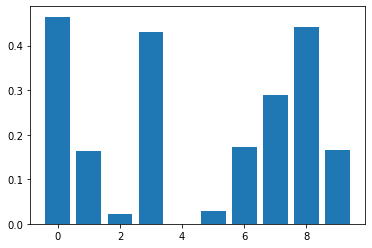

In [59]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
#input feature 0, 3, 7, 8 are most relevant

In this case, the data contain categorical data. Types of feature selection here is filters method under supervised feature selection, in which we use chi-square test and mutual information. 

The Filter methodology uses the selected metric to identify irrelevant attributes and also filter out redundant columns from the models. It gives the option of isolating selected measures that enrich a model. The columns are ranked following the calculation of the feature scores.

Advantages of Filter methods
Filter methods are model agnostic(compatible)
Rely entirely on features in the data set
Computationally very fast
Based on different statistical methods